In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from ugali import isochrone
from ugali.analysis.imf import imfFactory
from scipy.optimize import curve_fit
from pygaia.errors.astrometric import parallax_uncertainty, proper_motion_uncertainty


%matplotlib inline
plt.style.use('default.mplstyle')

/global/homes/t/tvnguyen/.conda/envs/torch-py11/lib/python3.11/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Test if 'chabrier' works
imf_chabrier = imfFactory('Chabrier2003')

# Load observed data from CSV
aau_data = pd.read_csv('observed.csv')

# Extract relevant columns for CMD
g_mag = aau_data['decam_g']
r_mag = aau_data['decam_r']
bhb_mask = aau_data['type'].str.strip() == 'bhb'
color_g_r = g_mag - r_mag

iso = isochrone.factory(name='Dotter',
                         age=11.2,  # Gyr
                         metallicity=0.00016,  # Approximate Z value for the stream metallicity
                         distance_modulus=16.807,  # Average distance modulus from the stream properties
                         imf=imf_chabrier,
                         survey='des'
                        )

decam_g = iso.mag_1
decam_r = iso.mag_2

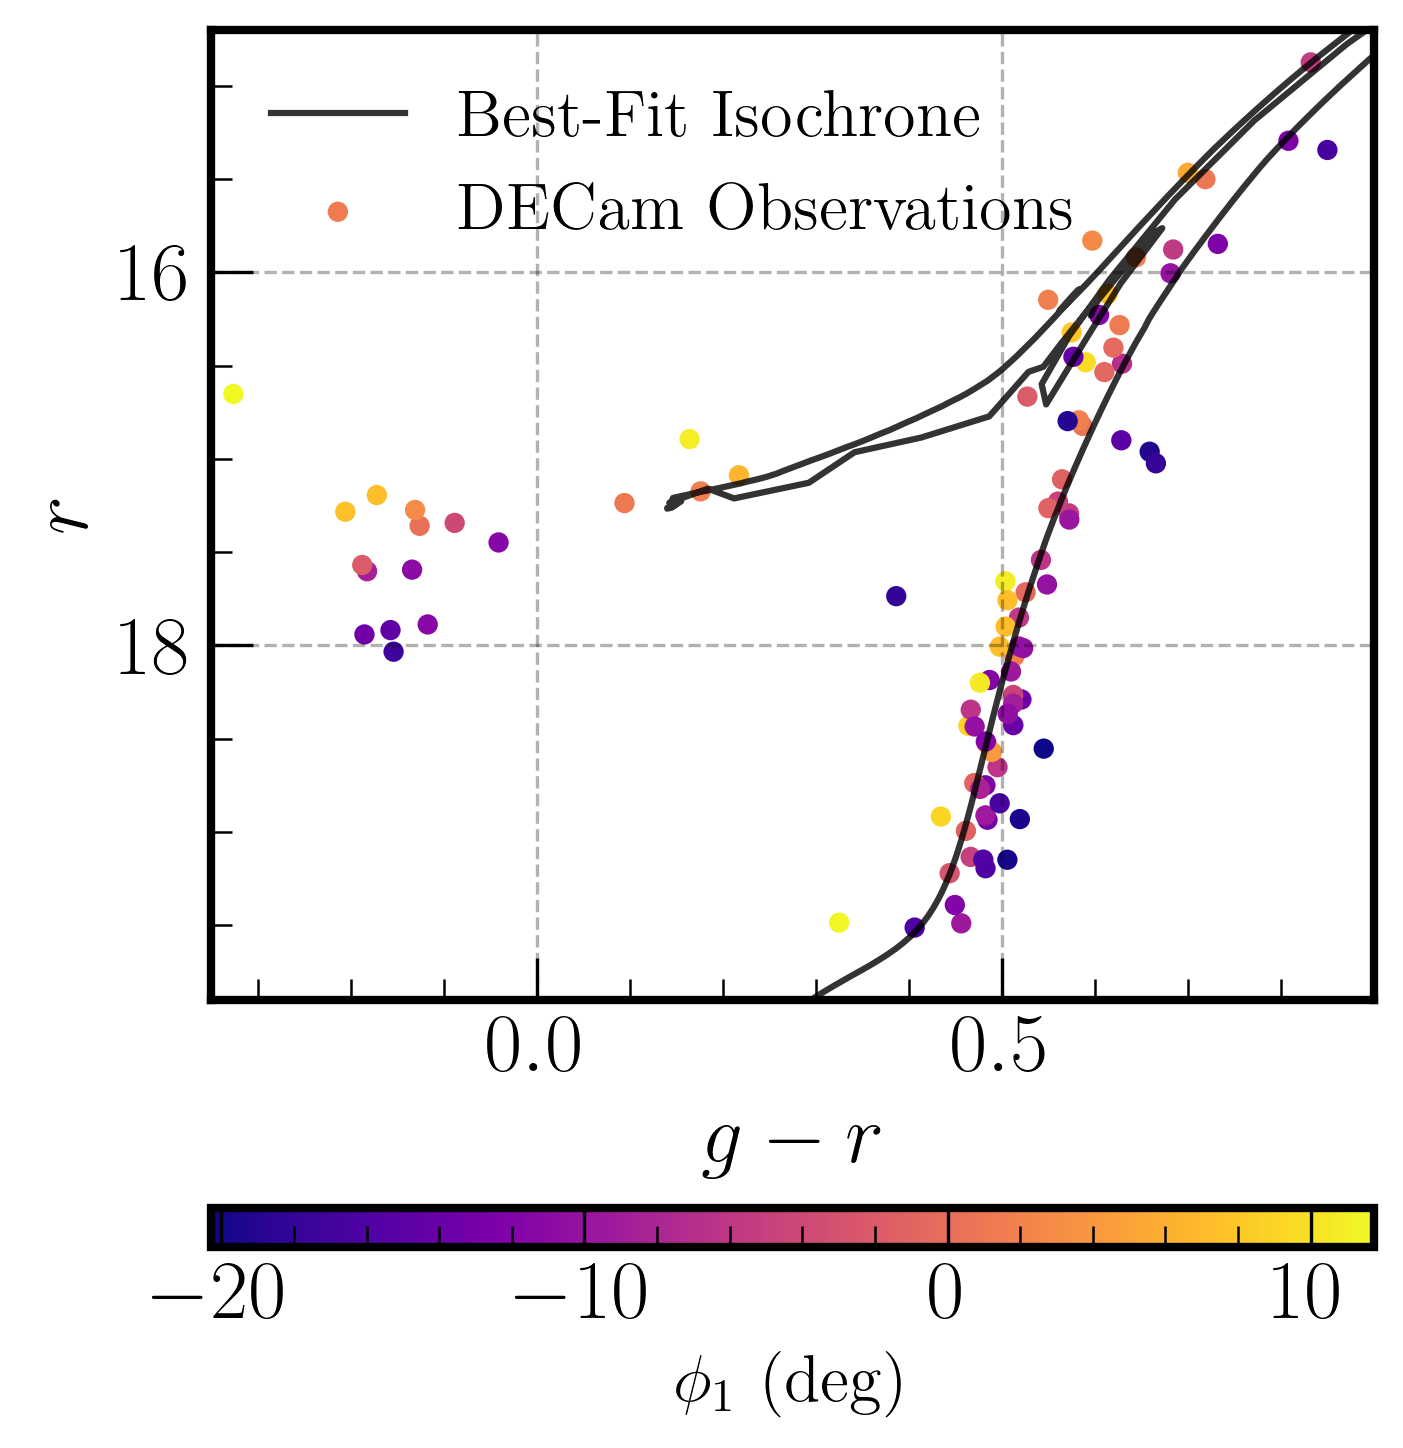

In [3]:
fig, ax = plt.subplots(figsize=(5, 6), dpi=300)

ax.plot(
    iso.mag_1 - iso.mag_2 + 0.04,
    iso.mag_2 + iso.distance_modulus,
    # marker='o',
    c='k',
    alpha=0.8,
    label='Best-Fit Isochrone'
)

empty_mask = aau_data['distance_modulus'].isna()
ax.scatter(
    color_g_r, r_mag, marker='o', c=aau_data['phi1'],
    cmap='plasma', s=15,
    label='DECam Observations'
)
ax.set_xlabel(r'$g - r$ ')
ax.set_ylabel(r'$r$')
ax.set_xlim(-0.35, 0.9)
ax.set_ylim(19.9, 14.7)
ax.legend(loc='upper left', fontsize=16)

# colorbar
cbar = plt.colorbar(
    ax.collections[0], ax=ax, orientation='horizontal',
    pad=0.15, aspect=30, shrink=1)
cbar.set_label(r'$\phi_1$ (deg)', fontsize=16)

fig.savefig('figures/cmd.pdf', bbox_inches='tight', dpi=300)